### Imports

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1

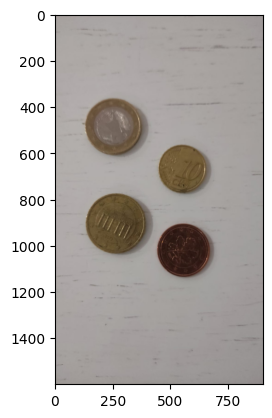

In [81]:
img = cv2.imread('imagen.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

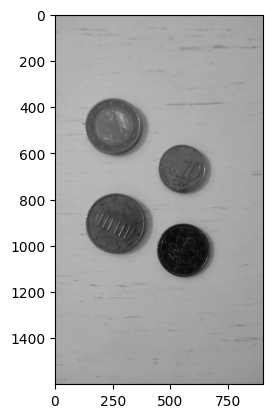

In [82]:
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gimg, cmap='gray')

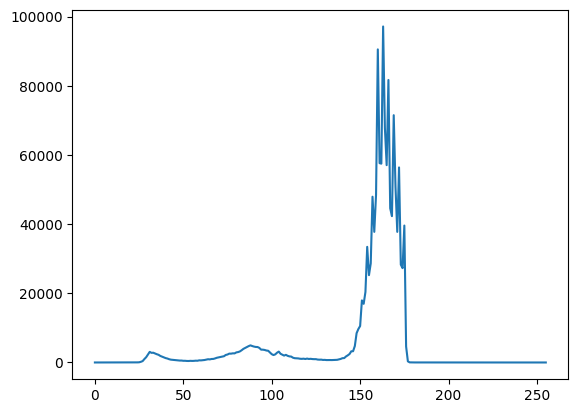

In [83]:
hist = cv2.calcHist([gimg], [0], None, [256], [0, 256])
plt.plot(hist)

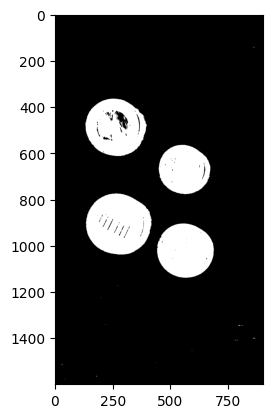

In [84]:
_, thimg = cv2.threshold(gimg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thimg, cmap='gray')

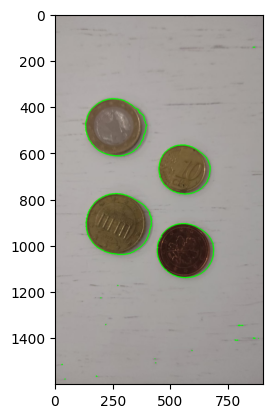

In [85]:
contours, hierarchy = cv2.findContours(thimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.cvtColor(cv2.drawContours(img, contours, -1, (0, 255, 0), 3), cv2.COLOR_BGR2RGB))


In [88]:
# *=> consts
SIZE_GAP = .04
CTRL_COIN = 1
COIN_SIZE = { # diametro (mm)
    .01: 16.26,
    .02: 18.75,
    .05: 21.25,
    .1: 19.75,
    .2: 22.25,
    .5: 24.25,
    1: 23.25,
    2: 25.75
}

click_pos = None

tmp_img = np.array(img)
        

def test_pos(pos, contours):
    """Test if a position is inside a contour"""
    global ctrl_cont

    for c in contours:
        if cv2.pointPolygonTest(c, pos, False) >=0:
           ctrl_cont = c
           return True
        
    return False


def click(event, x, y, flags, params):
    """Click event, shows clicked point & give click position"""
    global click_pos
    if event == cv2.EVENT_LBUTTONUP:
        tmp_img = np.array(img)
        cv2.circle(tmp_img, (x,y), 10, (255, 0, 0), -1)
        cv2.imshow('Monedas', tmp_img)
        click_pos = (x, y)



# Ask user to click on a control coin until is a valid position (inside a contour)
while click_pos == None or not test_pos(click_pos, contours):
    cv2.namedWindow("Monedas")
    cv2.setMouseCallback('Monedas', click)

    while True:
        cv2.imshow('Monedas', cv2.drawContours(tmp_img, contours, -1, (0, 255, 0), 3))
        if cv2.waitKey(0) & 0xFF == 27: break

    cv2.destroyAllWindows()
    cv2.waitKey(1)


# Calculates control radius & proportionality constant for control contour
_, ctrl_rad = cv2.minEnclosingCircle(ctrl_cont)
kprop = COIN_SIZE[CTRL_COIN]/ctrl_rad


# Calculates value for the sum
summ = 0
for c in contours:
    if cv2.contourArea(c) > 10:
        _, radius = cv2.minEnclosingCircle(c)
        
        for item in COIN_SIZE.items():
            if item[1]*(1-SIZE_GAP) <= radius*kprop <= item[1]*(1+SIZE_GAP):
                summ+=item[0]
                break

print(f'Valor final: {summ} €')

Valor final: 1.65 €


##### Aclaración

La precisión a la hora de acertar la moneda, es muy dependiente del gap usado, en este caso se ha ajustado, usando como referencia la foto proporcionada por el profesor, y tomando el gap más alto que de el resultado correcto (se ha ajustado a mano), dando como resultado un **gap** de **0.04**, es decir, un **4%**.  
Al pasar a una imagen real (sin solapamientos), ha resultado en un valor adecuado.

### Ejercicio 2